In [1]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y =pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name 

In [4]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
y = y.sort_index().fillna(0.) #check if these are time where earning where not issued or no div period

In [ ]:
#X_train, X_test, y_train

In [7]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


In [8]:
y = y.loc["2004-03-31":]

In [9]:
y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [10]:
from pytrends.request import TrendReq

In [ ]:
# # Create pytrends object
# pytrends = TrendReq(hl='en-US', tz=360)

# # Set up the keywords and the timeframe
# keywords = ["iPhone", "Samsung", "Interest Rates", "New Phone", "Phone repair", "Buy iPhone", "Sell iPhone"] # Add your keywords here
# start_date = '2004-01-01'
# end_date = '2024-01-01'

# # Create an empty DataFrame to store the results
# df = pd.DataFrame()

# # Iterate through keywords and fetch data
# for keyword in keywords:
#     pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
#     interest_over_time_df = pytrends.interest_over_time()
#     df[keyword] = interest_over_time_df[keyword]

In [13]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Mac", "June", "Camera", "iPad", "CEO", "Innovation", "Dodger Game", "UCLA", "Election"] # Add your keywords here
start_date = '2004-01-01'
end_date = '2023-09-30'
#end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [ ]:
df

In [14]:
df = df.resample("Q").mean()

In [ ]:
# # Create pytrends object
# pytrends = TrendReq(hl='en-US', tz=360)

# # Set up the keywords and the timeframe
# keywords = ['Example Phrase 1", "Example Phrase 2"]  # Add your keywords here
# start_date = '2004-01-01'
# end_date = '2024-01-01'

# # Create an empty DataFrame to store the results
# df = pd.DataFrame()

# # Iterate through keywords and fetch data
# for keyword in keywords:
#     pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
#     interest_over_time_df = pytrends.interest_over_time()
#     df[keyword] = interest_over_time_df[keyword]

# 2.) Normalize all the X data

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.4, random_state=42)

In [18]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size =0.5, random_state = 42)

In [ ]:
X_train

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [19]:
from sklearn.linear_model import Lasso

In [55]:
lasso = Lasso(alpha = .1) #.5
lasso.fit(X_scaled, y)

coefficients = lasso.coef_ #check which

In [33]:
coefficients

array([-0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.])

In [29]:
import matplotlib.pyplot as plt

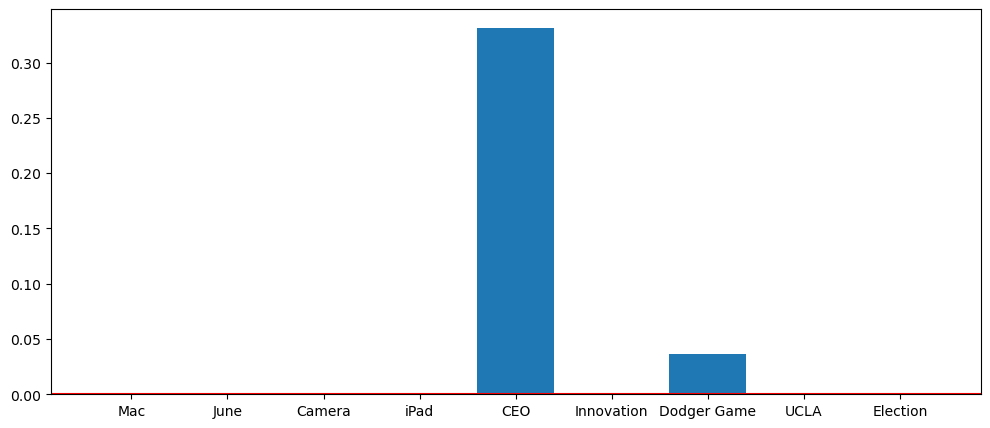

In [58]:
plt.figure(figsize = (12,5))
#plt.bar(range(len(coefficients)), coefficients, df.columns)
plt.bar(df.columns, coefficients)
plt.axhline(0, color = "red")
#insert label....
plt.show()

In [47]:
df.columns

Index(['Mac', 'June', 'Camera', 'iPad', 'CEO', 'Innovation', 'Dodger Game',
       'UCLA', 'Election'],
      dtype='object')

In [48]:
df

,Mac,June,Camera,iPad,CEO,Innovation,Dodger Game,UCLA,Election
date,,,,,,,,,
2004-03-31,70.666667,6.666667,87.666667,0.000000,38.000000,91.333333,0.333333,88.333333,1.333333
2004-06-30,66.333333,25.666667,85.333333,0.000000,36.666667,86.666667,0.666667,82.666667,1.666667
2004-09-30,65.333333,6.666667,81.666667,0.000000,37.000000,80.000000,0.333333,74.333333,1.333333
2004-12-31,71.666667,4.666667,92.000000,0.000000,37.666667,83.333333,0.333333,85.000000,6.333333
2005-03-31,77.333333,6.333333,74.000000,0.000000,47.666667,86.666667,0.000000,82.666667,1.000000
...,...,...,...,...,...,...,...,...,...
2022-09-30,40.000000,12.000000,54.666667,23.666667,93.000000,78.000000,13.000000,33.000000,1.000000
2022-12-31,40.666667,8.000000,53.666667,27.000000,87.333333,79.000000,4.666667,40.666667,4.666667
2023-03-31,40.000000,10.666667,56.000000,23.666667,91.000000,85.000000,1.000000,41.333333,1.333333


# 5.) Do these coefficient magnitudes make sense?

Yes, these coefficients are sensible values. CEO is quite related to the other coefficients listed and subsequently might capture the information contained in the data. It is also the most common term and that might also be a reason for its strong value. Interesting the Dodger have a very small coefficient value, indicating there might be some relationship that ought to be investigate or it might be capturing another correlated value.

In [ ]:
###Stop at 5!!!!!

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?